# STUDENT STRESS FACTORS DATASET
#### This dataset contains 20 features that create the most impact on the Stress of a Student. The features are selected scientifically considering 5 major factors, they are Psychological, Physiological, Social, Environmental and Academic Factors. 
### DESCRIPTION
##### Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression'
##### Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
##### Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs'
##### Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'
##### Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Import Data

In [22]:
data = pd.read_csv("E:\DataScience\ML\ML_Project_5(on_classification)\StressLevel_dataset.csv")
df = pd.DataFrame(data)
print(df.to_string())

      anxiety_level  self_esteem  mental_health_history  depression  headache  blood_pressure  sleep_quality  breathing_problem  noise_level  living_conditions  safety  basic_needs  academic_performance  study_load  teacher_student_relationship  future_career_concerns  social_support  peer_pressure  extracurricular_activities  bullying  stress_level
0                14           20                      0          11         2               1              2                  4            2                  3       3            2                     3           2                             3                       3               2              3                           3         2             1
1                15            8                      1          15         5               3              1                  4            3                  1       2            2                     1           4                             1                       5               1            

### Basic Information

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


### Data Cleaning

#### Check Null Values

In [24]:
print(df.isna().sum())        # no null values

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


#### Check Duplicates

In [25]:
print(df.duplicated())           # no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1095    False
1096    False
1097    False
1098    False
1099    False
Length: 1100, dtype: bool


### Check Outliers

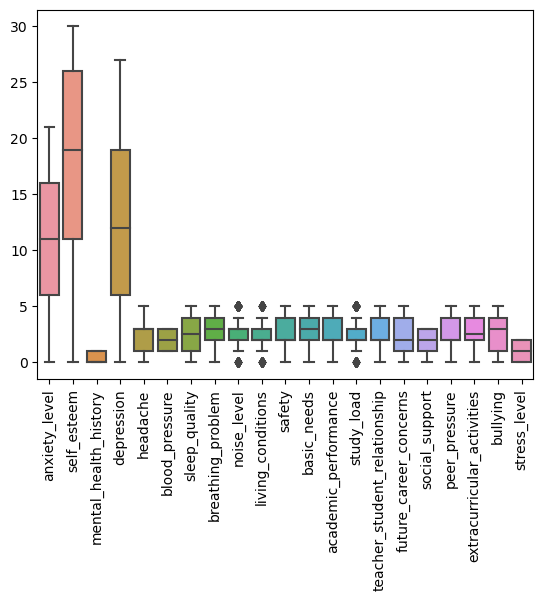

In [26]:
# finding outliers using boxplot from seaborn 
sns.boxplot(data)           
plt.xticks(rotation = 90)
plt.show()

### Statistical Analysis

In [27]:
print(data.describe(include='all'))

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

#### Correlation

                              anxiety_level  self_esteem  \
anxiety_level                          1.00        -0.67   
self_esteem                           -0.67         1.00   
mental_health_history                  0.63        -0.60   
depression                             0.69        -0.70   
headache                               0.63        -0.63   
blood_pressure                         0.33        -0.51   
sleep_quality                         -0.71         0.66   
breathing_problem                      0.56        -0.51   
noise_level                            0.61        -0.57   
living_conditions                     -0.57         0.55   
safety                                -0.65         0.64   
basic_needs                           -0.64         0.63   
academic_performance                  -0.65         0.64   
study_load                             0.59        -0.58   
teacher_student_relationship          -0.66         0.65   
future_career_concerns                 0

<Axes: >

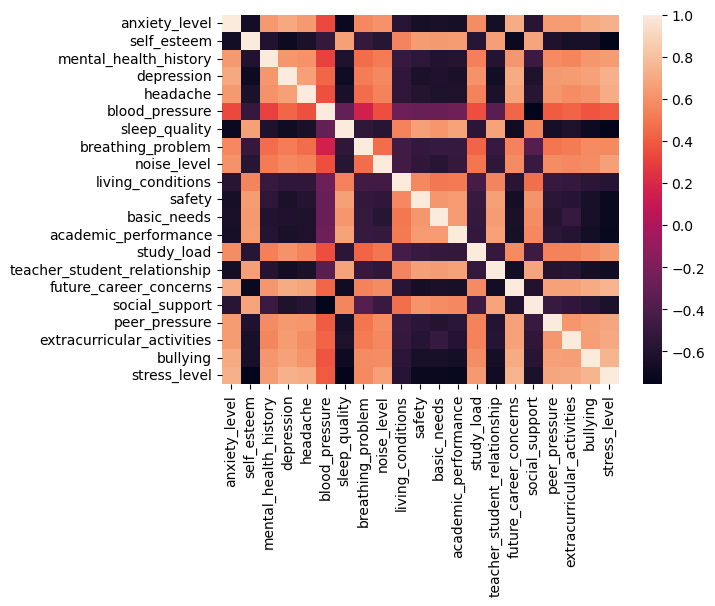

In [28]:
corre = data.corr(numeric_only=True)
print(np.around(corre, decimals = 2))

# plot
sns.heatmap(corre)

#### Covariance

                              anxiety_level  self_esteem  \
anxiety_level                         37.42       -36.81   
self_esteem                          -36.81        80.01   
mental_health_history                  1.94        -2.70   
depression                            32.82       -48.35   
headache                               5.46        -7.89   
blood_pressure                         1.69        -3.84   
sleep_quality                         -6.73         9.18   
breathing_problem                      4.81        -6.40   
noise_level                            4.95        -6.79   
living_conditions                     -3.89         5.51   
safety                                -5.60         8.10   
basic_needs                           -5.59         8.09   
academic_performance                  -5.62         8.09   
study_load                             4.72        -6.77   
teacher_student_relationship          -5.62         8.09   
future_career_concerns                 6

<Axes: >

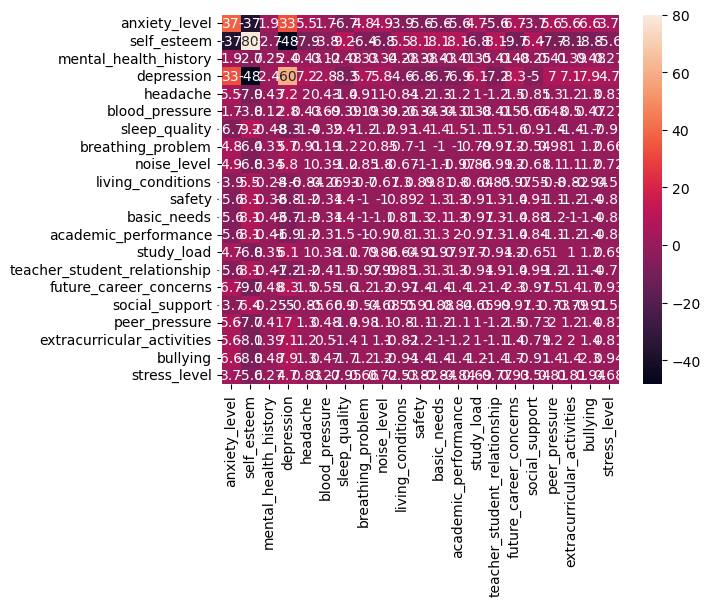

In [29]:
cova = data.cov(numeric_only=True)
print(np.around(cova, decimals = 2))

# plot
sns.heatmap(cova, annot = True)

### Extract Dependent and Independent Variables

In [30]:
x = data.iloc[:, 0:]        # independent var
y = data['stress_level']    # dependent var

### Split Train and Test Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

### Build Model

#### Scatter Plot

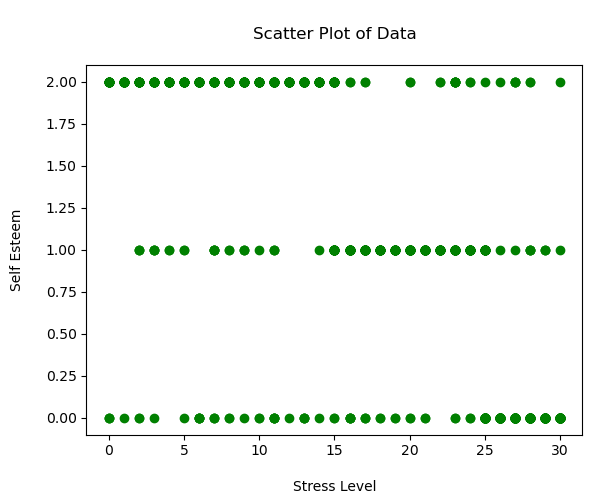

In [32]:
# plot graph
plt.scatter(data['self_esteem'], y, color="g")
plt.xlabel("\nStress Level")
plt.ylabel("Self Esteem\n")
plt.title("\nScatter Plot of Data\n")
plt.show()

#### Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

lr = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (lr*100))

Accuracy: 99.09


#### Using Random Forest Classifier

In [34]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test= ss.transform(x_test)

# Fitting Random classifier to the training set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
rfc.fit(x_train, y_train)

# Predicting the test set result
y_pred= rfc.predict(x_test)

rf = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (rf*100))

Accuracy: 98.64


#### Using Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dtc.fit(x_train, y_train)

#Predicting the test set result
y_pred= dtc.predict(x_test)

dt = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (dt*100))

Accuracy: 100.00


#### Using K-NN Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2 )
knc.fit(x_train, y_train)

#Predicting the test set result
y_pred= knc.predict(x_test)

knn = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (knn*100))

Accuracy: 88.64


#### Using Naïve Bayes Gaussian Model

In [37]:
from sklearn.naive_bayes import GaussianNB

gc = GaussianNB()
gc.fit(x_train, y_train)

y_pred = gc.predict(x_test)

gauss = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (gauss*100))

Accuracy: 100.00


#### Evaluating the Algorithm

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Model Performance Comparison

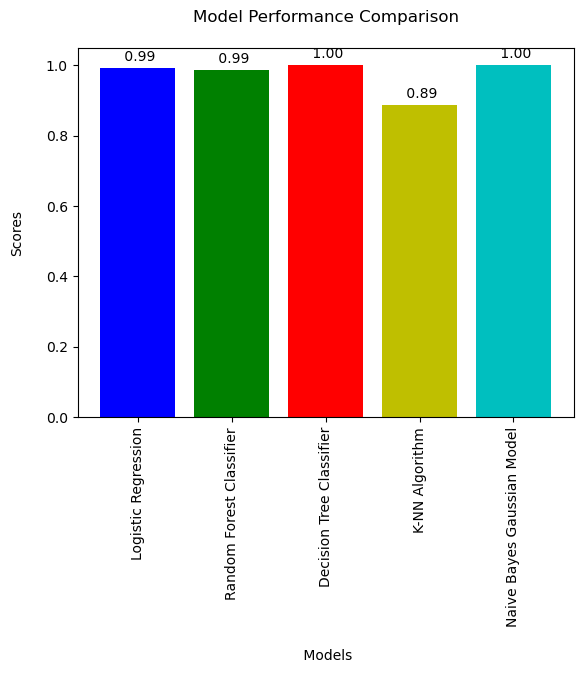

In [39]:
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'K-NN Algorithm', 'Naive Bayes Gaussian Model']
scores = [lr, rf, dt, knn, gauss]
plt.bar(models, scores, color = ['b','g','r','y','c'])
plt.title('Model Performance Comparison\n')
plt.xlabel('\n Models')
plt.ylabel('Scores\n')
plt.xticks(rotation = 90)
for i, score in enumerate(scores):
    plt.text(i, score+ 0.02, f'{score: 0.2f}', ha = 'center')
plt.show()

### The data was fitted into 5 different models in which Decision Tree Classifier and Naive Bayes Gaussian Model predicted 100% accuracy.